<a href="https://colab.research.google.com/github/Azufendei/SPAM-Detection/blob/main/SPAM_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Getting the dataset

In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/Advanced_ML_DL_spam_classification_L4/spam.csv

--2023-11-19 11:00:45--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/Advanced_ML_DL_spam_classification_L4/spam.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.1s    

2023-11-19 11:00:45 (3.22 MB/s) - ‘spam.csv’ saved [503663/503663]



Importing libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
import os

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Viewing of the dataset characteristics

In [ ]:
data = pd.read_csv('spam.csv', encoding = 'latin-1')
data.shape
data.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Dropping unnecessary values and numericalisation of spam and ham values and adding it as a new feature (1 for spam and 0 for ham)

In [ ]:
data=data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
data['spam']=data['v1'].apply(lambda x: 1 if x== 'spam' else 0)

Creating dataframe

In [ ]:
df=pd.DataFrame(data)

Data Visualising

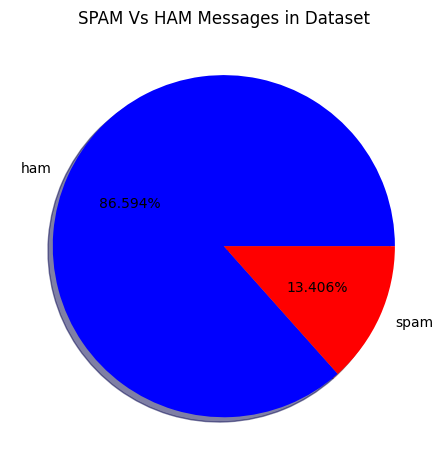

In [ ]:
labels = data.v1.unique()
# getting the count of each class
sizes = data.v1.value_counts().values
# plot the class value counts
fig, ax = plt.subplots()
colors=['blue','red']
ax.pie(sizes, labels=labels, autopct='%1.3f%%',colors=colors,shadow=True)
ax.set_title('SPAM Vs HAM Messages in Dataset')
plt.tight_layout()
plt.show()


Splitting the dataset

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(df.v2,df.spam, test_size = 0.30, random_state = 42)
print('X_train.shape=', x_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', x_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (3900,) Y_train.shape= (3900,)
X_test.shape= (1672,) Y_test.shape= (1672,)


Data Preprocessing

In [ ]:
#count vectorisation
cv = CountVectorizer()
x_train_count = cv.fit_transform(x_train.values).toarray()

Model Training

In [ ]:
Model=MultinomialNB()
Model.fit(x_train_count,y_train)

MultinomialNB()

Pretesting

In [ ]:
test_sms_spam=["congratulations you are elligible for a free iphone"]
test_spam_count = cv.transform(test_sms_spam)
Model.predict(test_spam_count)

array([1])

Above response of 1 demonstrates that spam message has been succesfully identified


In [ ]:
test_sms_ham=["Do not forget to mail the work once you are finished with it"]
test_ham_count = cv.transform(test_sms_ham)
Model.predict(test_ham_count)

array([0])

Above response of 0 demonstrates that spam message has been succesfully identified

---



Testing and final score

In [ ]:
x_test_count=cv.transform(x_test)
Model.score(x_test_count,y_test)

0.9820574162679426